In [1]:
from matplotlib import pyplot as plt
from nbmetalog import nbmetalog as nbm
from teeplot import teeplot as tp


In [2]:
from pylib import StratumRetentionPredicateMaximal
from pylib import StratumRetentionPredicateMinimal
from pylib import StratumRetentionPredicateDepthProportionalResolution
from pylib import StratumRetentionPredicateFixedResolution
from pylib import StratumRetentionPredicateRecencyProportionalResolution
from pylib import StratumRetentionPredicateRecursiveInterspersion
from pylib import StratumRetentionPredicateStochastic


In [3]:
from pylib import HereditaryStratigraphicColumn
 

TODO


In [4]:
def drip_plot(*, testfun, length):
  for site in range(length):
    for curtime in range(site, length):
      if (not testfun(site, curtime)):
        break
    plt.plot([site, site], [site, curtime], 'k')

  plt.gca().invert_yaxis()


teeplots/./num_layers=1000+stratum_retention_predicate=maximal+viz=drip-plot+ext=.pdf
teeplots/./num_layers=1000+stratum_retention_predicate=maximal+viz=drip-plot+ext=.png


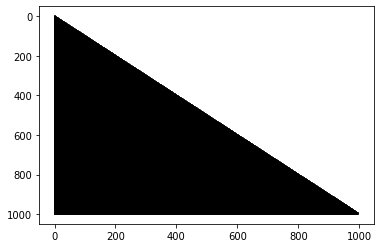

In [12]:
num_layers = 1000
tp.tee(
    drip_plot,
    testfun=StratumRetentionPredicateMaximal(),
    length=num_layers,
    teeplot_outattrs={
        **nbm.collate_outattr_metadata(),
        **{
            'num_layers' : num_layers,
            'stratum_retention_predicate' : 'maximal',
        },
    }
)
plt.show()


teeplots/./num_layers=1000+stratum_retention_predicate=minimal+viz=drip-plot+ext=.pdf
teeplots/./num_layers=1000+stratum_retention_predicate=minimal+viz=drip-plot+ext=.png


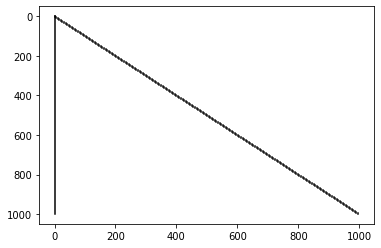

In [6]:
num_layers = 1000
tp.tee(
    drip_plot,
    testfun=StratumRetentionPredicateMinimal(),
    length=num_layers,
    teeplot_outattrs={
        **nbm.collate_outattr_metadata(),
        **{
            'num_layers' : num_layers,
            'stratum_retention_predicate' : 'minimal',
        },
    }
)
plt.show()


teeplots/./num_layers=100+stratum_retention_predicate=stochastic+viz=drip-plot+ext=.pdf
teeplots/./num_layers=100+stratum_retention_predicate=stochastic+viz=drip-plot+ext=.png


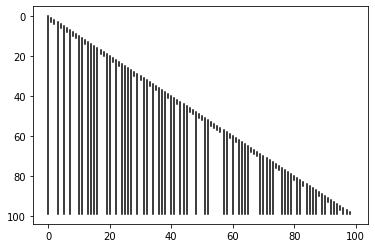

In [8]:
num_layers = 100
tp.tee(
    drip_plot,
    testfun=StratumRetentionPredicateStochastic(),
    length=num_layers,
    teeplot_outattrs={
        **nbm.collate_outattr_metadata(),
        **{
            'num_layers' : num_layers,
            'stratum_retention_predicate' : 'stochastic',
        },
    }
)
plt.show()


teeplots/./guaranteed_mrca_recency_proportional_resolution=2+num_layers=1000+stratum_retention_predicate=recency_proportional_resolution+viz=drip-plot+ext=.pdf
teeplots/./guaranteed_mrca_recency_proportional_resolution=2+num_layers=1000+stratum_retention_predicate=recency_proportional_resolution+viz=drip-plot+ext=.png


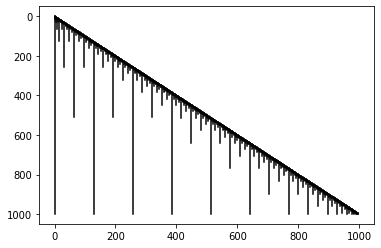

teeplots/./guaranteed_mrca_recency_proportional_resolution=3+num_layers=1000+stratum_retention_predicate=recency_proportional_resolution+viz=drip-plot+ext=.pdf
teeplots/./guaranteed_mrca_recency_proportional_resolution=3+num_layers=1000+stratum_retention_predicate=recency_proportional_resolution+viz=drip-plot+ext=.png


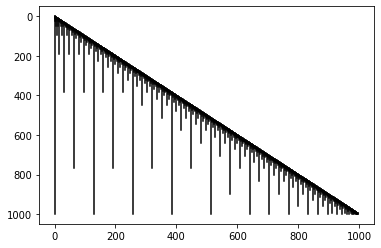

teeplots/./guaranteed_mrca_recency_proportional_resolution=10+num_layers=1000+stratum_retention_predicate=recency_proportional_resolution+viz=drip-plot+ext=.pdf
teeplots/./guaranteed_mrca_recency_proportional_resolution=10+num_layers=1000+stratum_retention_predicate=recency_proportional_resolution+viz=drip-plot+ext=.png


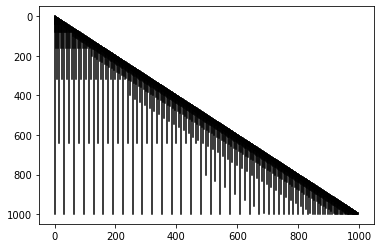

teeplots/./guaranteed_mrca_recency_proportional_resolution=100+num_layers=1000+stratum_retention_predicate=recency_proportional_resolution+viz=drip-plot+ext=.pdf
teeplots/./guaranteed_mrca_recency_proportional_resolution=100+num_layers=1000+stratum_retention_predicate=recency_proportional_resolution+viz=drip-plot+ext=.png


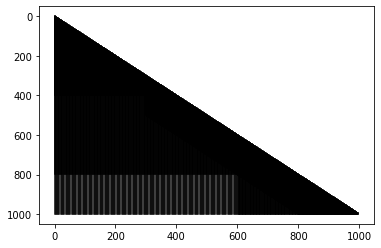

In [5]:
num_layers = 1000
for guaranteed_mrca_recency_proportional_resolution in 2, 3, 10, 100,:
    tp.tee(
        drip_plot,
        testfun=StratumRetentionPredicateRecencyProportionalResolution(
                guaranteed_mrca_recency_proportional_resolution=guaranteed_mrca_recency_proportional_resolution,
        ),
        length=num_layers,
        teeplot_outattrs={
            **nbm.collate_outattr_metadata(),
            **{
                'guaranteed_mrca_recency_proportional_resolution' : guaranteed_mrca_recency_proportional_resolution,
                'num_layers' : num_layers,
                'stratum_retention_predicate' : 'recency_proportional_resolution',
            },
        }
    )
    plt.show()


teeplots/./guaranteed_depth_proportional_resolution=1+num_layers=1000+stratum_retention_predicate=depth_proportional_resolution+viz=drip-plot+ext=.pdf
teeplots/./guaranteed_depth_proportional_resolution=1+num_layers=1000+stratum_retention_predicate=depth_proportional_resolution+viz=drip-plot+ext=.png


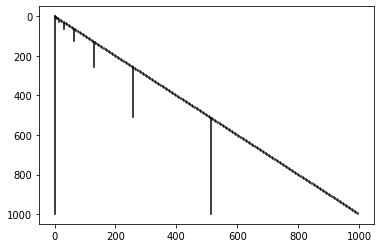

teeplots/./guaranteed_depth_proportional_resolution=2+num_layers=1000+stratum_retention_predicate=depth_proportional_resolution+viz=drip-plot+ext=.pdf
teeplots/./guaranteed_depth_proportional_resolution=2+num_layers=1000+stratum_retention_predicate=depth_proportional_resolution+viz=drip-plot+ext=.png


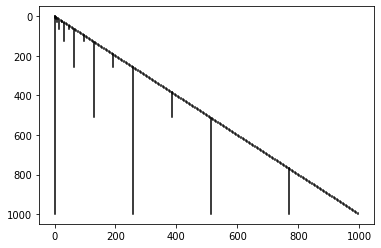

teeplots/./guaranteed_depth_proportional_resolution=3+num_layers=1000+stratum_retention_predicate=depth_proportional_resolution+viz=drip-plot+ext=.pdf
teeplots/./guaranteed_depth_proportional_resolution=3+num_layers=1000+stratum_retention_predicate=depth_proportional_resolution+viz=drip-plot+ext=.png


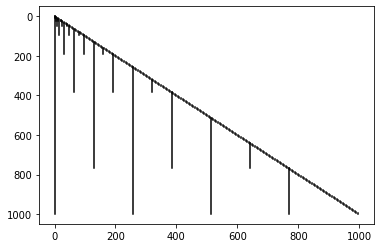

teeplots/./guaranteed_depth_proportional_resolution=42+num_layers=1000+stratum_retention_predicate=depth_proportional_resolution+viz=drip-plot+ext=.pdf
teeplots/./guaranteed_depth_proportional_resolution=42+num_layers=1000+stratum_retention_predicate=depth_proportional_resolution+viz=drip-plot+ext=.png


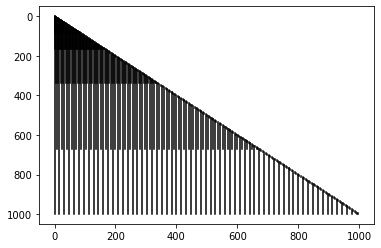

In [6]:
num_layers = 1000
for guaranteed_depth_proportional_resolution in [
    1, 2, 3, 42,
]:
    tp.tee(
        drip_plot,
        testfun=StratumRetentionPredicateDepthProportionalResolution(
            guaranteed_depth_proportional_resolution=guaranteed_depth_proportional_resolution,
        ),
        length=num_layers,
        teeplot_outattrs={
            **nbm.collate_outattr_metadata(),
            **{
                'guaranteed_depth_proportional_resolution' : guaranteed_depth_proportional_resolution,
                'num_layers' : num_layers,
                'stratum_retention_predicate' : 'depth_proportional_resolution',
            },
        }
    )
    plt.show()


In [5]:
def to_ascii(column):
    held_ranks = {column.CalcRankAtColumnIndex(index) for index in range(column.GetNumStrataRetained())}
    
    return ''.join([
        '|' if rank in held_ranks else ' '
        for rank in range(column.GetNumStrataDeposited())
    ])

In [8]:
predicate = StratumRetentionPredicateDepthProportionalResolution(
    guaranteed_depth_proportional_resolution=2,        
)
column = HereditaryStratigraphicColumn(
    stratum_retention_predicate=predicate,
)

for generation in range(1,31):
    print(f'{generation:2d}', to_ascii(column))
    column.DepositStratum()


 1 |
 2 ||
 3 |||
 4 | ||
 5 | | |
 6 | | ||
 7 | | | |
 8 |   |  |
 9 |   |   |
10 |   |   ||
11 |   |   | |
12 |   |   |  |
13 |   |   |   |
14 |   |   |   ||
15 |   |   |   | |
16 |       |      |
17 |       |       |
18 |       |       ||
19 |       |       | |
20 |       |       |  |
21 |       |       |   |
22 |       |       |    |
23 |       |       |     |
24 |       |       |      |
25 |       |       |       |
26 |       |       |       ||
27 |       |       |       | |
28 |       |       |       |  |
29 |       |       |       |   |
30 |       |       |       |    |


teeplots/./num_layers=100+stratum_retention_predicate=stochastic+viz=drip-plot+ext=.pdf
teeplots/./num_layers=100+stratum_retention_predicate=stochastic+viz=drip-plot+ext=.png


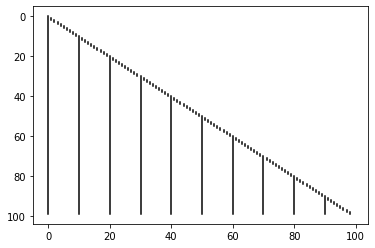

In [5]:
num_layers = 100
tp.tee(
    drip_plot,
    testfun=StratumRetentionPredicateFixedResolution(),
    length=num_layers,
    teeplot_outattrs={
        **nbm.collate_outattr_metadata(),
        **{
            'num_layers' : num_layers,
            'stratum_retention_predicate' : 'stochastic',
        },
    }
)
plt.show()


teeplots/./num_layers=1000+stratum_retention_predicate=recusive_interspersion+viz=drip-plot+ext=.pdf
teeplots/./num_layers=1000+stratum_retention_predicate=recusive_interspersion+viz=drip-plot+ext=.png


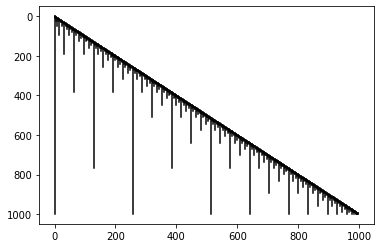

In [10]:
num_layers = 1000
tp.tee(
    drip_plot,
    testfun=StratumRetentionPredicateRecursiveInterspersion(3, 2),
    length=num_layers,
    teeplot_outattrs={
        **nbm.collate_outattr_metadata(),
        **{
            'num_layers' : num_layers,
            'stratum_retention_predicate' : 'recusive_interspersion',
        },
    }
)
plt.show()


7 5
7 5
8 4
9 5
13 9
14 10
15 11
8 4
9 5
10 4
11 5
10 4
11 5
12 4
13 9
14 10
13 9
14 10
15 11
16 8
17 9
18 10
19 11
12 4
13 9
14 10
15 11
16 8
25 17
26 18
27 19
28 20
29 21
30 22
31 23
14 10
15 11
16 8
17 9
18 10
15 11
16 8
17 9
18 10
19 11
20 8
21 9
22 10
23 11
16 8
17 9
18 10
19 11
20 8
18 10
19 11
20 8
21 9
22 10
19 11
20 8
21 9
22 10
23 11
24 8
25 17
26 18
27 19
28 20
20 8
21 9
22 10
23 11
24 8
25 17
26 18
27 19
28 20
29 21
30 22
31 23
32 16
33 17
34 18
35 19
36 20
37 21
38 22
39 23
22 10
23 11
24 8
25 17
26 18
23 11
24 8
25 17
26 18
27 19
28 20
29 21
30 22
31 23
32 16
24 8
25 17
26 18
27 19
28 20
49 33
50 34
51 35
52 36
53 37
54 38
55 39
56 40
57 41
58 42
59 43
60 44
61 45
62 46
63 47
26 18
27 19
28 20
29 21
30 22
27 19
28 20
29 21
30 22
31 23
32 16
33 17
34 18
35 19
36 20
28 20
29 21
30 22
31 23
32 16
29 21
30 22
31 23
32 16
33 17
34 18
35 19
36 20
37 21
38 22
39 23
40 16
41 17
42 18
43 19
44 20
45 21
46 22
47 23
30 22
31 23
32 16
33 17
34 18
31 23
32 16
33 17
34 18
35 19
36 20
3

233 169
234 170
235 171
236 172
237 173
238 174
239 175
240 176
241 177
242 178
243 179
244 180
245 181
246 182
247 183
248 184
249 185
250 186
251 187
252 188
253 189
254 190
255 191
256 128
257 129
258 130
259 131
260 132
261 133
262 134
263 135
264 136
265 137
266 138
267 139
268 140
269 141
270 142
271 143
272 144
234 170
235 171
236 172
237 173
238 174
235 171
236 172
237 173
238 174
239 175
240 176
241 177
242 178
243 179
244 180
236 172
237 173
238 174
239 175
240 176
237 173
238 174
239 175
240 176
241 177
242 178
243 179
244 180
245 181
246 182
247 183
248 184
249 185
250 186
251 187
252 188
253 189
254 190
255 191
256 128
238 174
239 175
240 176
241 177
242 178
239 175
240 176
241 177
242 178
243 179
244 180
245 181
246 182
247 183
248 184
240 176
241 177
242 178
243 179
244 180
241 177
242 178
243 179
244 180
245 181
246 182
247 183
248 184
249 185
250 186
251 187
252 188
253 189
254 190
255 191
256 128
257 129
258 130
259 131
260 132
261 133
262 134
263 135
264 136
265 137


339 147
340 148
341 149
342 150
343 151
344 152
345 153
346 154
347 155
348 156
340 148
341 149
342 150
343 151
344 152
341 149
342 150
343 151
344 152
345 153
346 154
347 155
348 156
349 157
350 158
351 159
352 160
353 161
354 162
355 163
356 164
357 165
358 166
359 167
360 168
342 150
343 151
344 152
345 153
346 154
343 151
344 152
345 153
346 154
347 155
348 156
349 157
350 158
351 159
352 160
344 152
345 153
346 154
347 155
348 156
345 153
346 154
347 155
348 156
349 157
350 158
351 159
352 160
353 161
354 162
355 163
356 164
357 165
358 166
359 167
360 168
361 169
362 170
363 171
364 172
365 173
366 174
367 175
368 176
369 177
370 178
371 179
372 180
373 181
374 182
375 183
376 184
377 185
378 186
379 187
380 188
381 189
382 190
383 191
384 128
346 154
347 155
348 156
349 157
350 158
347 155
348 156
349 157
350 158
351 159
352 160
353 161
354 162
355 163
356 164
348 156
349 157
350 158
351 159
352 160
349 157
350 158
351 159
352 160
353 161
354 162
355 163
356 164
357 165
358 166


435 307
436 308
437 309
438 310
439 311
440 312
441 313
442 314
443 315
444 316
436 308
437 309
438 310
439 311
440 312
437 309
438 310
439 311
440 312
441 313
442 314
443 315
444 316
445 317
446 318
447 319
448 320
449 321
450 322
451 323
452 324
453 325
454 326
455 327
456 328
438 310
439 311
440 312
441 313
442 314
439 311
440 312
441 313
442 314
443 315
444 316
445 317
446 318
447 319
448 320
440 312
441 313
442 314
443 315
444 316
441 313
442 314
443 315
444 316
445 317
446 318
447 319
448 320
449 321
450 322
451 323
452 324
453 325
454 326
455 327
456 328
457 329
458 330
459 331
460 332
461 333
462 334
463 335
464 336
465 337
466 338
467 339
468 340
469 341
470 342
471 343
472 344
473 345
474 346
475 347
476 348
477 349
478 350
479 351
480 352
442 314
443 315
444 316
445 317
446 318
443 315
444 316
445 317
446 318
447 319
448 320
449 321
450 322
451 323
452 324
444 316
445 317
446 318
447 319
448 320
445 317
446 318
447 319
448 320
449 321
450 322
451 323
452 324
453 325
454 326


545 289
546 290
547 291
548 292
549 293
550 294
551 295
552 296
553 297
554 298
555 299
556 300
557 301
558 302
559 303
560 304
561 305
562 306
563 307
564 308
565 309
566 310
567 311
568 312
569 313
570 314
571 315
572 316
573 317
574 318
575 319
576 320
577 321
578 322
579 323
580 324
581 325
582 326
583 327
584 328
585 329
586 330
587 331
588 332
589 333
590 334
591 335
592 336
593 337
594 338
595 339
596 340
597 341
598 342
599 343
600 344
601 345
602 346
603 347
604 348
605 349
606 350
607 351
608 352
609 353
610 354
611 355
612 356
613 357
614 358
615 359
616 360
617 361
618 362
619 363
620 364
621 365
622 366
623 367
624 368
625 369
626 370
627 371
628 372
629 373
630 374
631 375
632 376
633 377
634 378
635 379
636 380
637 381
638 382
639 383
640 256
641 257
642 258
643 259
644 260
645 261
646 262
647 263
648 264
649 265
650 266
651 267
652 268
653 269
654 270
655 271
656 272
657 273
658 274
659 275
660 276
661 277
662 278
663 279
664 280
665 281
666 282
667 283
668 284
669 285


607 351
608 352
609 353
610 354
611 355
612 356
613 357
614 358
615 359
616 360
608 352
609 353
610 354
611 355
612 356
609 353
610 354
611 355
612 356
613 357
614 358
615 359
616 360
617 361
618 362
619 363
620 364
621 365
622 366
623 367
624 368
625 369
626 370
627 371
628 372
629 373
630 374
631 375
632 376
633 377
634 378
635 379
636 380
637 381
638 382
639 383
640 256
641 257
642 258
643 259
644 260
645 261
646 262
647 263
648 264
649 265
650 266
651 267
652 268
653 269
654 270
655 271
656 272
657 273
658 274
659 275
660 276
661 277
662 278
663 279
664 280
665 281
666 282
667 283
668 284
669 285
670 286
671 287
672 288
673 289
674 290
675 291
676 292
677 293
678 294
679 295
680 296
681 297
682 298
683 299
684 300
685 301
686 302
687 303
688 304
689 305
690 306
691 307
692 308
693 309
694 310
695 311
696 312
697 313
698 314
699 315
700 316
701 317
702 318
703 319
704 320
705 321
706 322
707 323
708 324
709 325
710 326
711 327
712 328
713 329
714 330
715 331
716 332
717 333
718 334


697 313
698 314
695 311
696 312
697 313
698 314
699 315
700 316
701 317
702 318
703 319
704 320
696 312
697 313
698 314
699 315
700 316
697 313
698 314
699 315
700 316
701 317
702 318
703 319
704 320
705 321
706 322
707 323
708 324
709 325
710 326
711 327
712 328
713 329
714 330
715 331
716 332
717 333
718 334
719 335
720 336
721 337
722 338
723 339
724 340
725 341
726 342
727 343
728 344
729 345
730 346
731 347
732 348
733 349
734 350
735 351
736 352
698 314
699 315
700 316
701 317
702 318
699 315
700 316
701 317
702 318
703 319
704 320
705 321
706 322
707 323
708 324
700 316
701 317
702 318
703 319
704 320
701 317
702 318
703 319
704 320
705 321
706 322
707 323
708 324
709 325
710 326
711 327
712 328
713 329
714 330
715 331
716 332
717 333
718 334
719 335
720 336
702 318
703 319
704 320
705 321
706 322
703 319
704 320
705 321
706 322
707 323
708 324
709 325
710 326
711 327
712 328
704 320
705 321
706 322
707 323
708 324
705 321
706 322
707 323
708 324
709 325
710 326
711 327
712 328


778 522
779 523
780 524
781 525
782 526
779 523
780 524
781 525
782 526
783 527
784 528
785 529
786 530
787 531
788 532
780 524
781 525
782 526
783 527
784 528
781 525
782 526
783 527
784 528
785 529
786 530
787 531
788 532
789 533
790 534
791 535
792 536
793 537
794 538
795 539
796 540
797 541
798 542
799 543
800 544
782 526
783 527
784 528
785 529
786 530
783 527
784 528
785 529
786 530
787 531
788 532
789 533
790 534
791 535
792 536
784 528
785 529
786 530
787 531
788 532
785 529
786 530
787 531
788 532
789 533
790 534
791 535
792 536
793 537
794 538
795 539
796 540
797 541
798 542
799 543
800 544
801 545
802 546
803 547
804 548
805 549
806 550
807 551
808 552
809 553
810 554
811 555
812 556
813 557
814 558
815 559
816 560
817 561
818 562
819 563
820 564
821 565
822 566
823 567
824 568
825 569
826 570
827 571
828 572
829 573
830 574
831 575
832 576
833 577
834 578
835 579
836 580
837 581
838 582
839 583
840 584
841 585
842 586
843 587
844 588
845 589
846 590
847 591
848 592
849 593


878 622
879 623
880 624
881 625
882 626
879 623
880 624
881 625
882 626
883 627
884 628
885 629
886 630
887 631
888 632
880 624
881 625
882 626
883 627
884 628
881 625
882 626
883 627
884 628
885 629
886 630
887 631
888 632
889 633
890 634
891 635
892 636
893 637
894 638
895 639
896 640
897 641
898 642
899 643
900 644
901 645
902 646
903 647
904 648
905 649
906 650
907 651
908 652
909 653
910 654
911 655
912 656
913 657
914 658
915 659
916 660
917 661
918 662
919 663
920 664
921 665
922 666
923 667
924 668
925 669
926 670
927 671
928 672
929 673
930 674
931 675
932 676
933 677
934 678
935 679
936 680
937 681
938 682
939 683
940 684
941 685
942 686
943 687
944 688
945 689
946 690
947 691
948 692
949 693
950 694
951 695
952 696
953 697
954 698
955 699
956 700
957 701
958 702
959 703
960 704
882 626
883 627
884 628
885 629
886 630
883 627
884 628
885 629
886 630
887 631
888 632
889 633
890 634
891 635
892 636
884 628
885 629
886 630
887 631
888 632
885 629
886 630
887 631
888 632
889 633


981 725
982 726
983 727
984 728
985 729
986 730
987 731
988 732
989 733
990 734
991 735
992 736
993 737
994 738
995 739
996 740
997 741
998 742
999 743
982 726
983 727
984 728
985 729
986 730
983 727
984 728
985 729
986 730
987 731
988 732
989 733
990 734
991 735
992 736
984 728
985 729
986 730
987 731
988 732
985 729
986 730
987 731
988 732
989 733
990 734
991 735
992 736
993 737
994 738
995 739
996 740
997 741
998 742
999 743
986 730
987 731
988 732
989 733
990 734
987 731
988 732
989 733
990 734
991 735
992 736
993 737
994 738
995 739
996 740
988 732
989 733
990 734
991 735
992 736
989 733
990 734
991 735
992 736
993 737
994 738
995 739
996 740
997 741
998 742
999 743
990 734
991 735
992 736
993 737
994 738
991 735
992 736
993 737
994 738
995 739
996 740
997 741
998 742
999 743
992 736
993 737
994 738
995 739
996 740
993 737
994 738
995 739
996 740
997 741
998 742
999 743
994 738
995 739
996 740
997 741
998 742
995 739
996 740
997 741
998 742
999 743
996 740
997 741
998 742
999 743


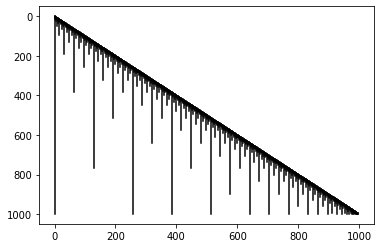

In [6]:
num_layers = 1000
tp.tee(
    drip_plot,
    testfun=StratumRetentionPredicateRecursiveInterspersion(3, 1),
    length=num_layers,
    teeplot_outattrs={
        **nbm.collate_outattr_metadata(),
        **{
            'num_layers' : num_layers,
            'stratum_retention_predicate' : 'recusive_interspersion',
        },
    }
)
plt.show()


teeplots/./num_layers=1000+stratum_retention_predicate=recusive_interspersion+viz=drip-plot+ext=.pdf
teeplots/./num_layers=1000+stratum_retention_predicate=recusive_interspersion+viz=drip-plot+ext=.png


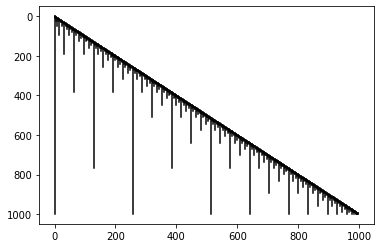

In [6]:
num_layers = 1000
tp.tee(
    drip_plot,
    testfun=StratumRetentionPredicateRecencyProportionalResolution(3),
    length=num_layers,
    teeplot_outattrs={
        **nbm.collate_outattr_metadata(),
        **{
            'num_layers' : num_layers,
            'stratum_retention_predicate' : 'recusive_interspersion',
        },
    }
)
plt.show()
